## Chapter 2's Table of Contents

* [2.1 Initial EDA](#2_1)
* [2.2 Regional Analysis of Government Responses to Protests](#2_2)
* [2.3 Country Analysis of Government Responses to Protests](#2_2)
    * [2.3.1 Top 20 Countries With the Most Number of Aggressive Government Responses](#2_3_1)
    * [2.3.2 Top 20 Countries With the Highest Rate of Aggressive Government Responses ](#2_3_2)
* [2.4 Trend of Government Aggressive Responses over the years ](#2_4)
* [2.5 Means of Variables Given Aggressive Government Responses to Protests](#2_5)
* [2.6 Aggressive Government Response based on Duration of Protest ](#2_6)
* [2.7 Aggressive Government Response based on No. of Protesters ](#2_7)
* [2.8 Protester Demands that Face the Most Number of Aggressive Government Responses](#2_8)
* [2.9 Protester Groups that Face the Most Number of Aggressive Government Responses ](#2_9)
* [3.0 Which Protester Groups are more involved in which Protester Demands?](#3_0)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load data
df = pd.read_csv('../project_4b/data/protest_cleaned_STARWARS.csv')

In [3]:
df.head()

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions,notes_lemmatized,abortion,activists,anti_democracy,democracy,opposition,educators,environmental,human_rights,immigrants,ethnic_discrimination,lgbtq,local_residents,peasants_villagers,refugees,religion,separatist_independence,students,veterans,men,women,agriculture,white_collar,blue_collar,unemployed,youths,unspecified_protesters
0,Canada,1990,North America,1,0,1000.0,protester,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,1,0,1,0,1,0,0,0,0,"['canada', 'railway', 'passenger', 'system', '...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Canada,1990,North America,2,0,1000.0,protester,protestors were only identified as young peopl...,1990-06-25,1990-06-25,1,0,0,0,1,0,0,0,0,"['protestors', 'identified', 'young', 'people'...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Canada,1990,North America,3,0,500.0,separatist parti quebecois,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,1,0,0,0,1,0,0,0,0,"['queen', 'calling', 'canadian', 'remain', 'un...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Canada,1990,North America,4,1,100.0,mohawk indian,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,57,0,0,1,0,0,0,0,0,"['canada', 'federal', 'government', 'agreed', ...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Canada,1990,North America,5,1,950.0,local resident,protests were directed against the state due t...,1990-08-14,1990-08-15,2,1,0,0,1,0,0,0,0,"['protest', 'directed', 'state', 'due', 'refus...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.1 Initial EDA <a class="anchor" id="2_1"></a>

In [4]:
df_mean = df[['protestdays','participantnumber', 'protestnumber']].mean()

df_mean

protestdays              2.607651
participantnumber    17635.743093
protestnumber            8.332633
dtype: float64

In [5]:
df['year'].value_counts().sort_index(axis=0)

1990    572
1991    372
1992    409
1993    329
1994    390
1995    355
1996    409
1997    488
1998    442
1999    411
2000    488
2001    393
2002    415
2003    387
2004    442
2005    497
2006    454
2007    445
2008    398
2009    376
2010    452
2011    688
2012    553
2013    586
2014    769
2015    857
2016    713
2017    541
2018    698
2019    814
2020     96
Name: year, dtype: int64

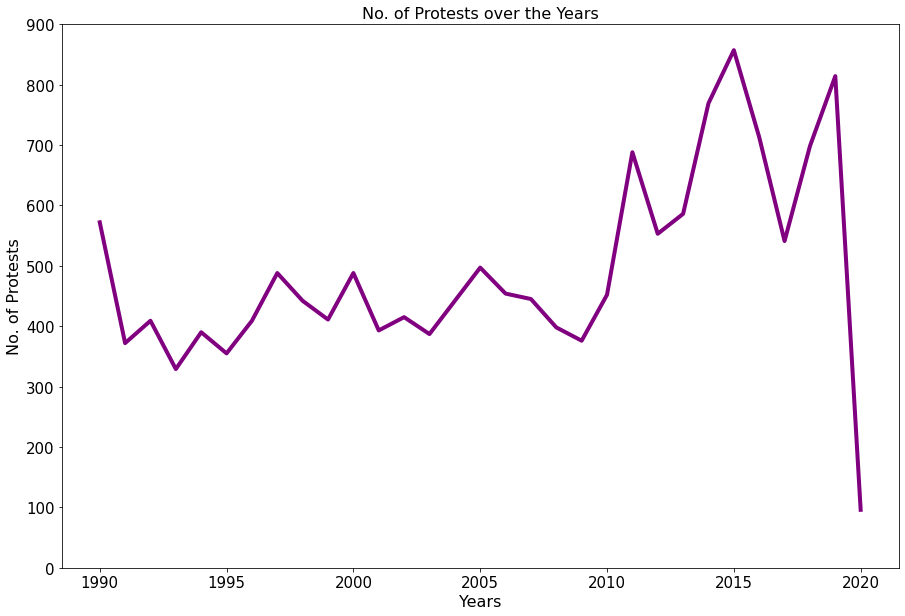

In [6]:
plt.figure(figsize=(15,10))
df['year'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=4, color='purple');
plt.title('No. of Protests over the Years', fontsize=16);
plt.xlabel('Years', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Protests', fontsize=16);
plt.ylim(0,900);
plt.savefig("../project_4b/charts/protests_by_years.jpg", bbox_inches = 'tight')

The number of protests worldwide had remained fairly stable from 1990 to 2010. Since 2010, protest numbers saw 3 surges in 2011, 2015 and 2019.

2011 saw a general increase across all regions with no discernable influence from any social actors. However, the Occupy Wall Street protest movement, which focuses on social and economic inequality between the richest 1% and the rest of the world, also erupted in 2011 across 950 cities. We believed that, while not directly responsible, the movement could have provoked negative sentiments in people to protest against other social issues.

The increase in protest numbers in 2015 seemed to point to racial issues. The Black Lives Matter movement actually started before the George Floyd incident in 2020. In 2015, a 25-year old african american was the victim of police brutality. His death lead to a wave of protests in the US.

A number of notable protests happened worldwide in 2019. While the student-led protest in Hong Kong was most familiar to us, protests in France, Iran and Haiti over issues of taxes, fuel hikes and corruption also saw thousands took to the streets.

## 2.2 Regional Analysis of Government Responses to Protests <a class="anchor" id="2_2"></a>

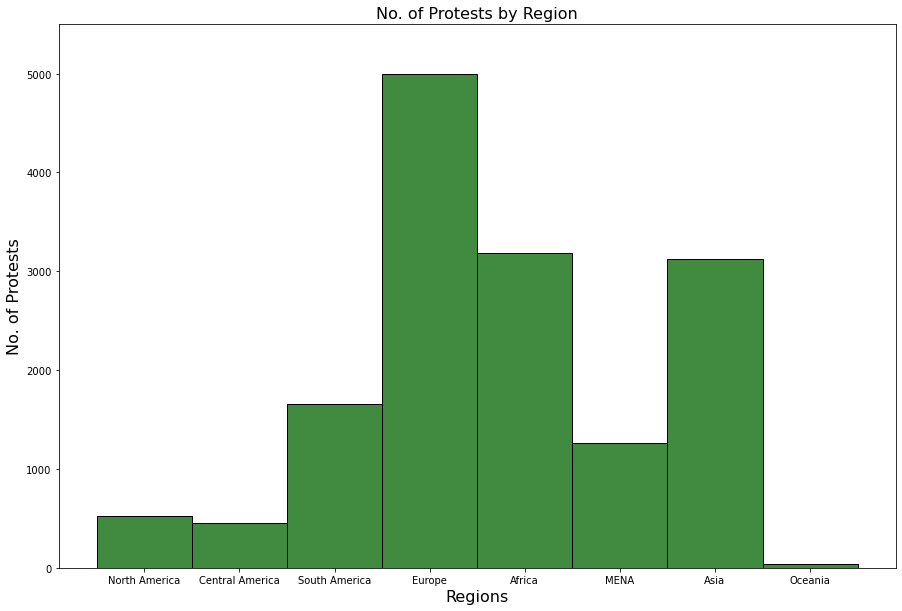

In [7]:
fig, histo_protests_by_region = plt.subplots(figsize=(15,10));
# histogram creation
color = 'darkgreen'
histo_protests_by_region.set_title('No. of Protests by Region', fontsize=16);
histo_protests_by_region.set_xlabel('Regions', fontsize=16);
histo_protests_by_region.set_ylabel('No. of Protests', fontsize=16);
histo_protests_by_region = sns.histplot(x='region', data = df, color=color);
plt.ylim(0,5500);
plt.savefig("../project_4b/charts/protests_by_region.jpg", bbox_inches = 'tight')

In [8]:
df.groupby('region')['aggressive_response'].value_counts()

region           aggressive_response
Africa           1                      1677
                 0                      1507
Asia             0                      1749
                 1                      1377
Central America  0                       286
                 1                       165
Europe           0                      3566
                 1                      1428
MENA             1                       692
                 0                       568
North America    0                       336
                 1                       191
Oceania          0                        24
                 1                        14
South America    0                      1016
                 1                       643
Name: aggressive_response, dtype: int64

In [9]:
aggression = df[df.aggressive_response != 0]
aggressive_region = aggression.groupby(['region']).size().reset_index(name='Count').sort_values(by= 'Count', ascending= False)

In [10]:
aggressive_region

,region,Count
0,Africa,1677
3,Europe,1428
1,Asia,1377
4,MENA,692
7,South America,643
5,North America,191
2,Central America,165
6,Oceania,14


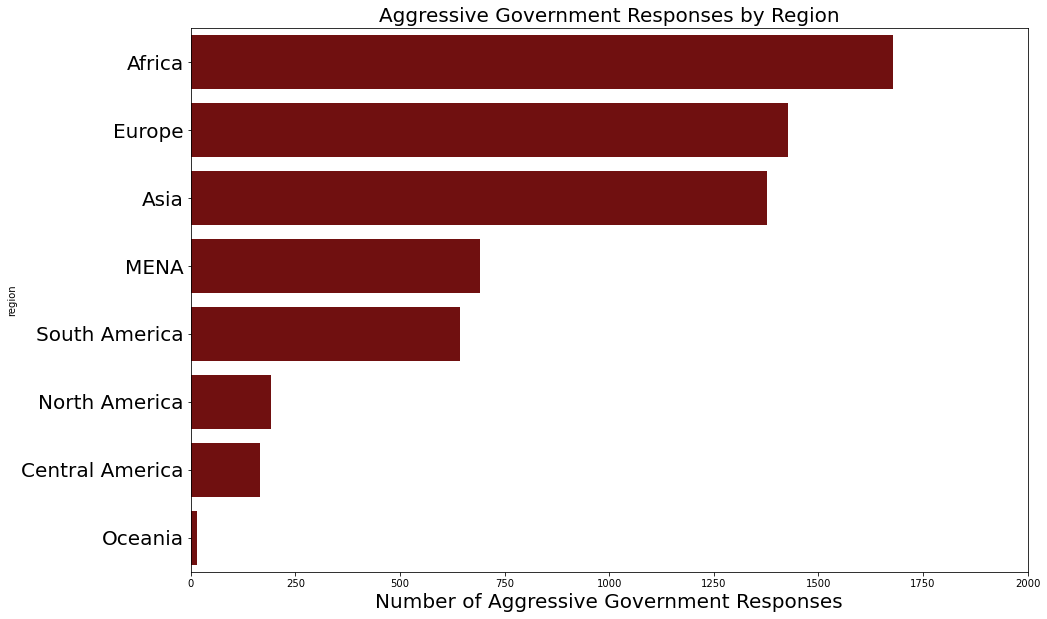

In [11]:
fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= aggressive_region.region, x = aggressive_region.Count,color='maroon',ax=ax);
ax.set_title('Aggressive Government Responses by Region',fontsize=20);
ax.set_xlabel('Number of Aggressive Government Responses', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.xlim(0,2000);
plt.savefig("../project_4b/charts/aggressive_gov_responses_by_region.jpg", bbox_inches = 'tight')

In [12]:
aggressive_region_percent = df.groupby('region')['aggressive_response'].mean().reset_index(name='PercentAggRes').sort_values(by= 'PercentAggRes',ascending = False).head(20)
aggressive_region_percent

,region,PercentAggRes
4,MENA,0.549206
0,Africa,0.526696
1,Asia,0.440499
7,South America,0.387583
6,Oceania,0.368421
2,Central America,0.365854
5,North America,0.362429
3,Europe,0.285943


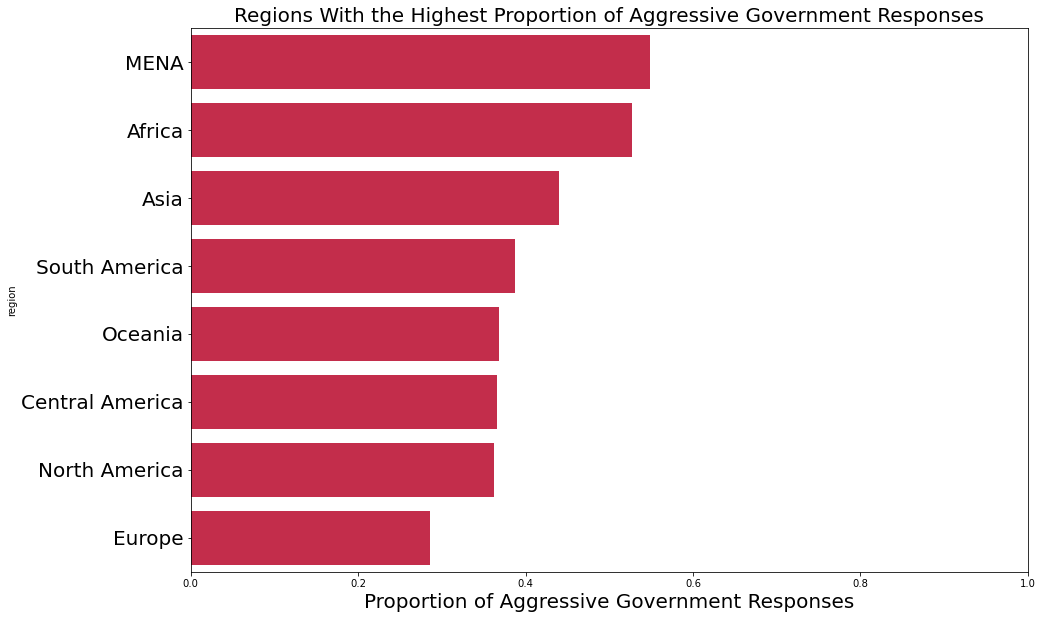

In [13]:
fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= aggressive_region_percent.region, x = aggressive_region_percent.PercentAggRes,color='crimson',ax=ax);
ax.set_title('Regions With the Highest Proportion of Aggressive Government Responses',fontsize=20);
ax.set_xlabel('Proportion of Aggressive Government Responses', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.xlim(0,1);
plt.savefig("../project_4b/charts/aggressive_gov_response_percent_by_region.jpg", bbox_inches = 'tight')

The Middle East/North Africa, Africa and Asia ranked the highest for proportion of aggressive government responses from 1990 - 2020.	

Despite having the second highest number of aggressive government response to protests, Europe is the region most tolerant to protests as it has the lowest proportion of aggressive government responses.

## 2.3 Country Analysis of Government Responses to Protests

### 2.3.1 Top 20 Countries With the Most Number of Aggressive Government Responses <a class="anchor" id="2_3_1"></a>

In [14]:
df.groupby('country')['aggressive_response'].value_counts()

country                   aggressive_response
Afghanistan               0                       28
                          1                       11
Albania                   1                       41
                          0                       37
Algeria                   1                       55
                          0                       50
Angola                    0                       12
                          1                       12
Argentina                 0                       83
                          1                       32
Armenia                   0                       79
                          1                       26
Austria                   0                       10
                          1                        3
Azerbaijan                1                       74
                          0                       52
Bahrain                   1                       36
                          0                       10


In [15]:
aggression = df[df.aggressive_response != 0]
aggressive_countries_20 = aggression.groupby(['country']).size().reset_index(name='Count').sort_values(by= 'Count', ascending= False).head(20)

In [16]:
aggressive_countries_20

,country,Count
9,Bangladesh,236
50,France,210
154,United Kingdom,198
28,China,191
76,Kenya,161
131,South Korea,143
157,Venezuela,139
57,Greece,127
102,Nepal,126
65,India,124


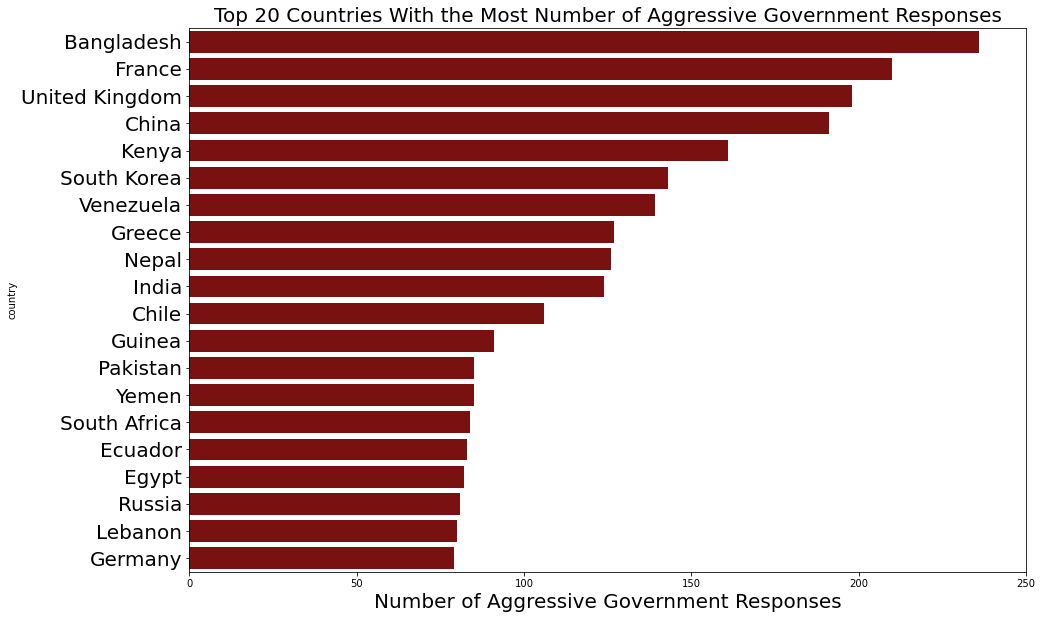

In [17]:
fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= aggressive_countries_20.country, x = aggressive_countries_20.Count,color='darkred',ax=ax);
ax.set_title('Top 20 Countries With the Most Number of Aggressive Government Responses',fontsize=20);
ax.set_xlabel('Number of Aggressive Government Responses', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.xlim(0,250);
plt.savefig("../project_4b/charts/top20_countries_aggressive_gov_response.jpg", bbox_inches = 'tight')

## 2.3.2 Top 20 Countries With the Highest Rate of Aggressive Government Responses <a class="anchor" id="2_3_2"></a>

In [18]:
aggressive_countries_20_percent = df.groupby('country')['aggressive_response'].mean().reset_index(name='PercentAggRes').sort_values(by= 'PercentAggRes',ascending = False).head(20)
aggressive_countries_20_percent

,country,PercentAggRes
81,Laos,1.000000
56,Germany West,1.000000
135,South Sudan,1.000000
127,Serbia and Montenegro,1.000000
46,Eritrea,1.000000
13,Bhutan,1.000000
40,Djibouti,0.900000
26,Chad,0.882353
60,Guinea,0.842593
138,Sudan,0.828125


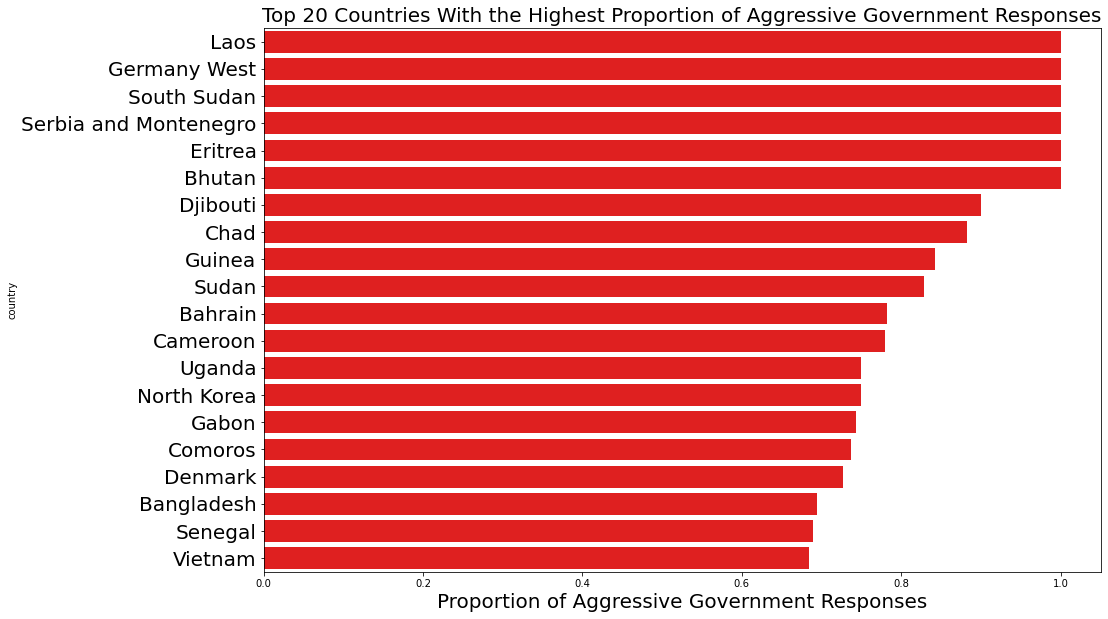

In [19]:
fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= aggressive_countries_20_percent.country, x = aggressive_countries_20_percent.PercentAggRes,color='red',ax=ax);
ax.set_title('Top 20 Countries With the Highest Proportion of Aggressive Government Responses',fontsize=20);
ax.set_xlabel('Proportion of Aggressive Government Responses', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.savefig("../project_4b/charts/top20_countries_aggressive_gov_response_highest_rate.jpg", bbox_inches = 'tight')

While Bangladesh, Uk and France top the list of highest number of aggressive government responses, African nations took centre stage when we look at countries with high aggressive government responses. Do note that the 6 countries with 100% aggressive government response all had less than 3 protests over 30 years.

Nations with low GDP per Capita feature highly on both lists. More than half of those in the top-20 lists come from countries ranked in the bottom 30% of nations of GDP per Capita by the Worldbank. Issues impacting livelihood of the population should could be high on the agenda for protests in these countries. 

Another notable group of countries that appear in the lists are those with armed conflicts, major and minor, over the last 30 years. Some of these protests could be precursors to a larger conflict down the road, i.e. leading to full-scale war. Further work could be done to see if such a correlation exist.

France, UK and South Korea are amongst the industrialised nations ranked highly for the number of aggressive government response. 

Protests in France mostly centred on unemployment and race/religious issues. For UK, the type of protests seen is a mixed bag but Brexit featured highly after 2016 and climate change after 2019. The bulk of South Korea's protests happened in the early 90s, when democratic institutions are still new and mistrusted by many (military dictatorship ended in 1987). Protests led by students aimed to prevent a return to past authoritarian practices. 

## 2.4 Trend of Government Aggressive Responses over the years <a class="anchor" id="2_4"></a>

In [20]:
df_yr_govtresponse = df.groupby(["region", "year"], as_index=False)["aggressive_response"].mean()
df_yr_govtresponse.head()

,region,year,aggressive_response
0,Africa,1990,0.621951
1,Africa,1991,0.571429
2,Africa,1992,0.500000
3,Africa,1993,0.541176
4,Africa,1994,0.547619


In [21]:
df_yr_govtresponse = df_yr_govtresponse.groupby('year')['aggressive_response'].apply(lambda df_yr_govtresponse: df_yr_govtresponse.reset_index(drop=True)).unstack().reset_index()
df_yr_govtresponse.rename(columns = {0: 'Africa', 1: 'Asia', 2: 'Central America', 3: 'Europe', 4: 'MENA', 5: 'North America', 6: 'Oceania', 7: 'South America'}, inplace = True)
df_yr_govtresponse.head()

,year,Africa,Asia,Central America,Europe,MENA,North America,Oceania,South America
0,1990,0.621951,0.606838,0.500000,0.341463,0.500000,0.647059,0.333333,0.270833
1,1991,0.571429,0.607843,0.500000,0.303030,0.533333,0.357143,1.000000,0.326923
2,1992,0.500000,0.492063,0.500000,0.313725,0.473684,0.333333,0.434783,NaN
3,1993,0.541176,0.600000,0.533333,0.265625,0.555556,0.300000,0.000000,0.341463
4,1994,0.547619,0.575758,0.307692,0.243697,0.500000,0.296296,0.412698,NaN


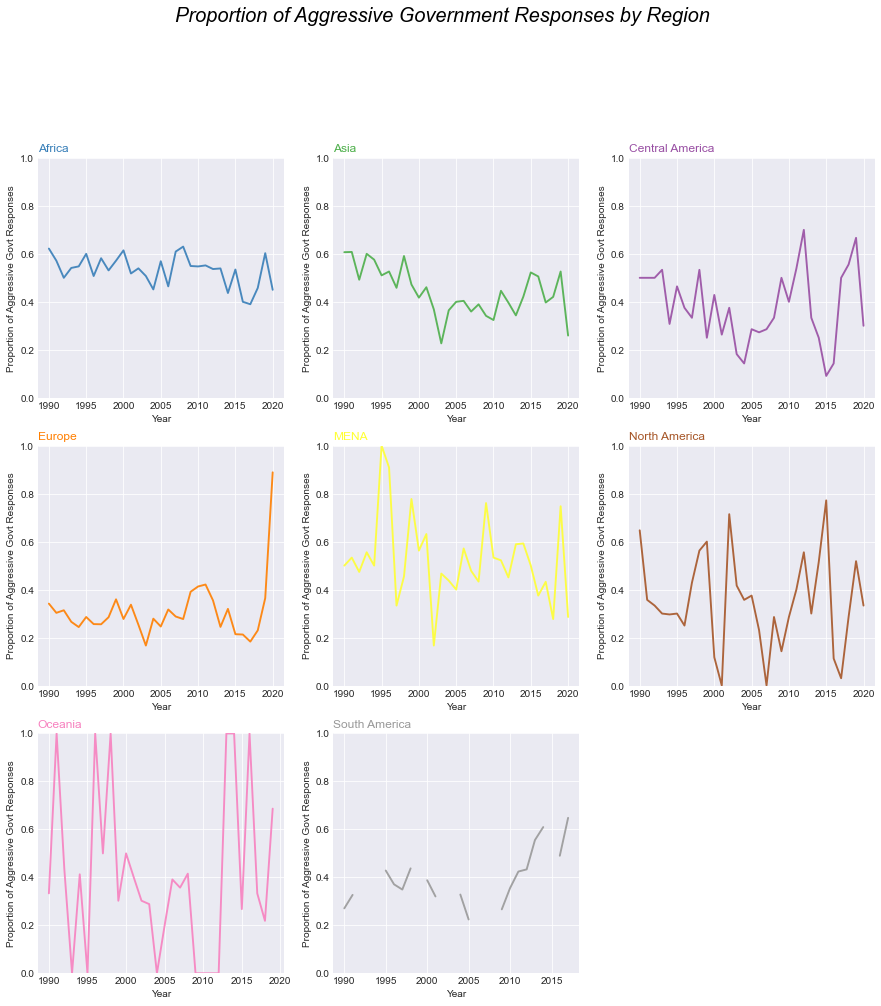

In [22]:
# Format Plot
plt.style.use('seaborn-darkgrid');
palette = plt.get_cmap('Set1');

fig = plt.figure(figsize=(15, 15));
# multiple line plot
num=0;
for column in df_yr_govtresponse.drop('year', axis=1):
    num+=1;
 
    # Find the right spot on the plot
    fig.add_subplot(3, 3, num);
#    plt.subplot(3,3, num)

    # Plot the lineplot
    plt.plot(df_yr_govtresponse['year'], df_yr_govtresponse[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column);
  
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off');
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off');
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num));
    plt.xlabel("Year");
    plt.ylabel("Proportion of Aggressive Govt Responses");
    plt.ylim(0,1);
# general title
plt.suptitle("Proportion of Aggressive Government Responses by Region", fontsize=20, fontweight=0, color='black', style='italic', y=1.02);

# Show the graph
# plt.show();
plt.savefig("../project_4b/charts/aggressive_gov_response_by_region_rate.jpg", bbox_inches = 'tight');

Central America, North America and the Middle East/North Africa saw higher fluctuations on aggressive government responses compared to other regions. There are no discernible trends but research suggest regime changes (especially in Central America when a new party come into power) could be the reason for the differentiated responses we are seeing.

Europe maintained a higher tolerance to protests except where aggressive governement responses were observed in 2019 and 2020. In 2019, Swedish activist Greta Thunberg condemned world leaders on their inertia over the climate crisis. This sparked a wave of protests globally, but most notably in Europe where many protests turned violent. It's no surprise then that aggressive government responses followed. 

2020 was the year of COVID-19. Protests mainly centred on governments' failure to contain the virus and people not willing to accept the restrictions imposed to curb the spread of the virus.

For Africa and Asia, we can see that governments are adopting 'softer' approaches to protests in recent years.

The much lower number of protests in Oceania and South America contributed to the trend fluctuating wildly over the years. 

## 2.5 Means of Variables Given Aggressive Government Responses to Protests <a class="anchor" id="2_5"></a>

In [23]:
aggressive_mean = aggression[['protestdays','participantnumber', 'protestnumber']].mean()

In [24]:
aggressive_mean

protestdays              3.272992
participantnumber    13228.387264
protestnumber            7.931146
dtype: float64

In [25]:
# In comparison, these are the mean values of all protests including ones not face with aggressive responses.

df_mean

protestdays              2.607651
participantnumber    17635.743093
protestnumber            8.332633
dtype: float64

In [26]:
# In comparison, these are the mean values of protests that were not faced with aggressive responses.

peaceful = df[df.aggressive_response != 1]

peaceful_mean = peaceful[['protestdays','participantnumber', 'protestnumber']].mean()

peaceful_mean

protestdays              2.152894
participantnumber    20648.150354
protestnumber            8.607048
dtype: float64

## 2.6 Aggressive Government Response based on Duration of Protest <a class="anchor" id="2_6"></a>

In [27]:
df['protestdays'].value_counts().sort_index(axis=0)

1      13203
2        729
3        309
4        163
5        112
6         66
7         54
8         73
9         41
10        33
11        33
12        22
13        24
14        17
15        36
16        19
17        14
18         8
19        10
20         8
21        10
22        12
23         6
24        11
25         7
26        11
27        13
28         9
29         6
30         6
31        10
32        17
33         3
34         3
35         6
36         1
37         5
38         2
40         4
41         1
42         2
43         2
44         2
45         4
46         4
47         2
48         1
50         5
51         2
52         3
53         1
54         6
56         1
57         1
58         1
59         2
60         2
61         1
62         5
63         1
64         2
65         2
66         2
67         1
68         1
69         1
72         1
73         1
74         1
75         3
76         1
77         1
78         1
79         2
81         2
82         2
84         2

In [28]:
aggression['protestdays'].value_counts().sort_index(axis=0)

1      5057
2       447
3       184
4        94
5        60
6        32
7        22
8        35
9        16
10       15
11       18
12       10
13        8
14        8
15        9
16        8
17        5
18        4
19        8
20        4
21        6
22        4
23        3
24        4
25        4
26        5
27        9
28        7
29        2
30        2
31        3
32        7
33        3
34        1
35        4
36        1
37        2
38        1
40        2
41        1
42        1
43        1
44        2
45        2
46        1
47        1
48        1
50        3
51        1
52        2
53        1
54        3
56        1
59        1
60        1
62        4
63        1
67        1
68        1
69        1
73        1
74        1
75        2
76        1
78        1
79        1
81        2
82        1
84        1
86        1
87        1
90        1
91        2
94        1
101       1
108       1
111       1
118       1
125       1
127       1
135       1
136       1
137       1
138 

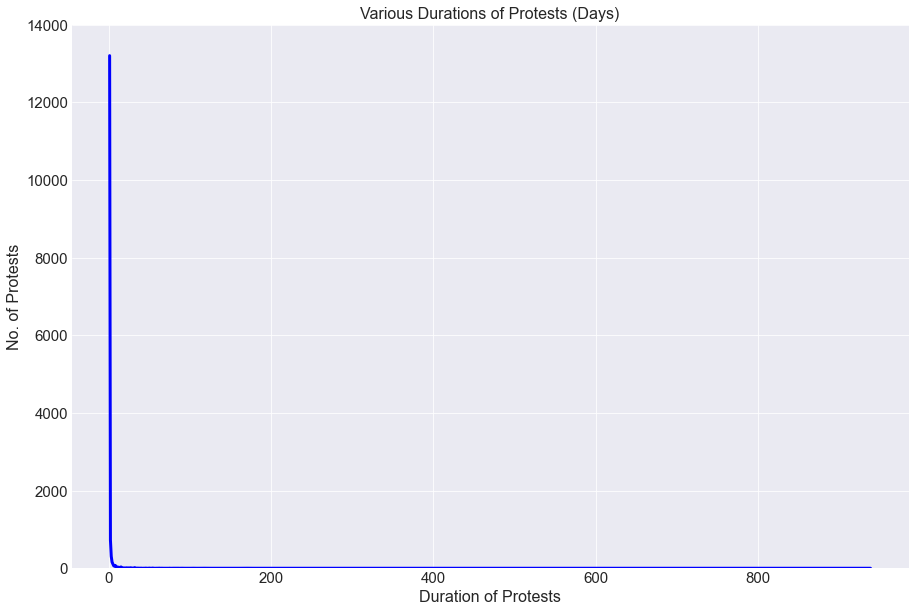

In [29]:
plt.figure(figsize=(15,10))
df['protestdays'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=3, color='blue');
plt.title('Various Durations of Protests (Days)', fontsize=16);
plt.xlabel('Duration of Protests', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Protests', fontsize=16);
plt.ylim(0,14000);
plt.savefig("../project_4b/charts/protests_by_protestdays.jpg", bbox_inches = 'tight')

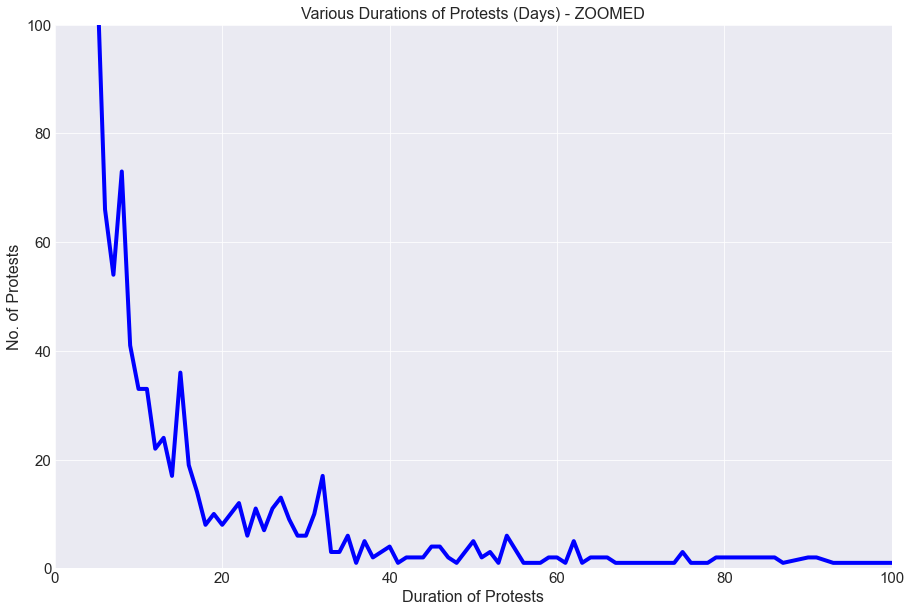

In [30]:
plt.figure(figsize=(15,10));
df['protestdays'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=4, color='blue');
plt.title('Various Durations of Protests (Days) - ZOOMED', fontsize=16);
plt.xlabel('Duration of Protests', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Protests', fontsize=16);
plt.xlim(0,100);
plt.ylim(0,100);
plt.savefig("../project_4b/charts/protests_by_protestdays_zoomed.jpg", bbox_inches = 'tight')

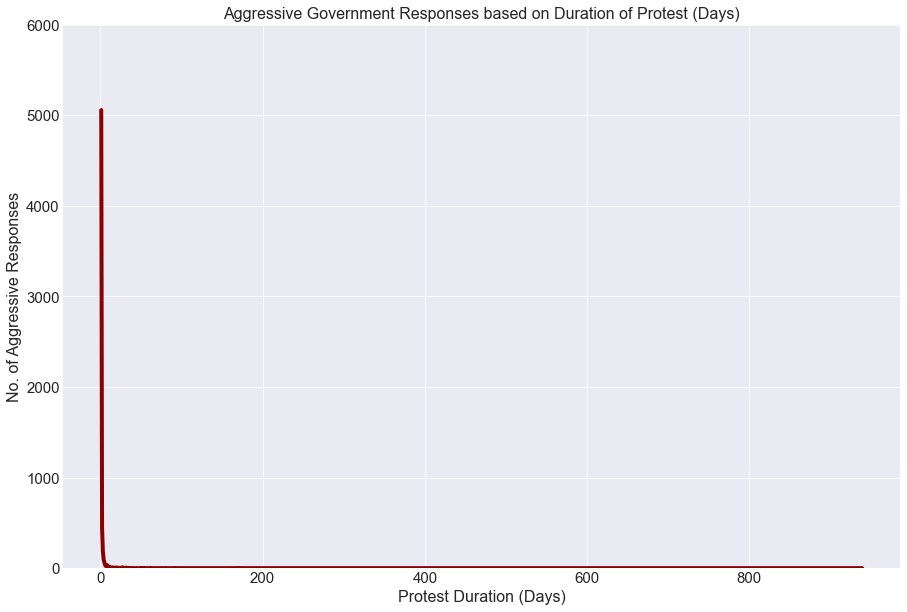

In [31]:
plt.figure(figsize=(15,10))
aggression['protestdays'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=4, color='darkred');
plt.title('Aggressive Government Responses based on Duration of Protest (Days)', fontsize=16);
plt.xlabel('Protest Duration (Days)', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Aggressive Responses', fontsize=16);
plt.ylim(0,6000);
plt.savefig("../project_4b/charts/aggressive_govt_response_by_protestdays.jpg", bbox_inches = 'tight')

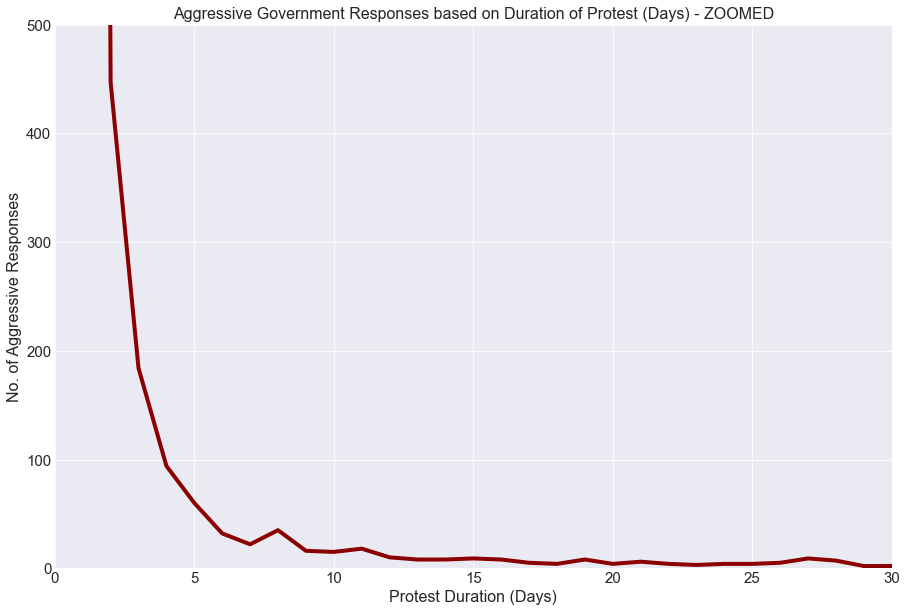

In [32]:
plt.figure(figsize=(15,10))
aggression['protestdays'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=4, color='darkred');
plt.title('Aggressive Government Responses based on Duration of Protest (Days) - ZOOMED', fontsize=16);
plt.xlabel('Protest Duration (Days)', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Aggressive Responses', fontsize=16);
plt.xlim(0,30);
plt.ylim(0,500);
plt.savefig("../project_4b/charts/aggressive_govt_response_by_protestdays_zoomed.jpg", bbox_inches = 'tight')

The **most frequent duration for a protest** to occur is **1 day**. **13203 out of 15239 protests (87%)** have lasted a mere day. Only 729 protests have even made it past 100 days. The general pattern is that lesser protests last a longer duration of time, with a few exceptions in between where some spikes are seen in the charts above. The overall trendline seems to be of steep decline, slight decline, and then becoming more or less flat.

The **most frequent duration for a protest** to be answered with **aggressive government response** is also **1 day**. **1414 protests** have been knocked back by aggressive responses by the end of the day they began. Very slight peaks are seen along a generally declining trendline that eventually becomes less steep and more or less flat.

## 2.7 Aggressive Government Response based on No. of Protesters <a class="anchor" id="2_7"></a>

In [33]:
df['participantnumber'].value_counts()

50.0         2987
100.0        1355
1000.0       1327
3000.0       1140
10000.0       992
550.0         986
500.0         767
200.0         448
2000.0        429
300.0         373
5000.0        318
1500.0        205
20000.0       198
100000.0      185
150.0         176
4000.0        176
400.0         163
60.0          158
7000.0        131
6000.0        124
15000.0       120
30000.0       119
3500.0        108
50000.0       103
700.0         101
2500.0         84
8000.0         81
75.0           80
250.0          67
600.0          65
400000.0       59
25000.0        55
450.0          52
40000.0        51
6500.0         49
800.0          49
200000.0       49
12000.0        48
1000000.0      47
370.0          46
70.0           44
7500.0         44
60000.0        32
80.0           31
300000.0       30
80000.0        28
150000.0       28
70000.0        26
500000.0       25
18000.0        24
180.0          23
35000.0        23
350.0          21
750.0          20
1100.0         20
14000.0   

In [34]:
aggression['participantnumber'].value_counts()

50.0         1390
100.0         694
1000.0        570
550.0         463
10000.0       392
3000.0        364
500.0         309
200.0         181
2000.0        179
300.0         147
5000.0        123
4000.0         68
400.0          68
7000.0         66
1500.0         64
20000.0        58
150.0          57
100000.0       45
700.0          43
60.0           42
3500.0         41
2500.0         36
6000.0         35
15000.0        30
400000.0       29
75.0           29
30000.0        28
50000.0        27
250.0          26
8000.0         25
600.0          23
6500.0         22
7500.0         21
70.0           18
40000.0        16
12000.0        16
450.0          16
1000000.0      16
200000.0       15
25000.0        14
800.0          14
370.0          13
80000.0        11
180.0          10
80.0           10
350.0          10
150000.0        9
60000.0         8
1300.0          8
590.0           7
750.0           7
3800.0          7
70000.0         7
300000.0        6
500000.0        6
1200.0    

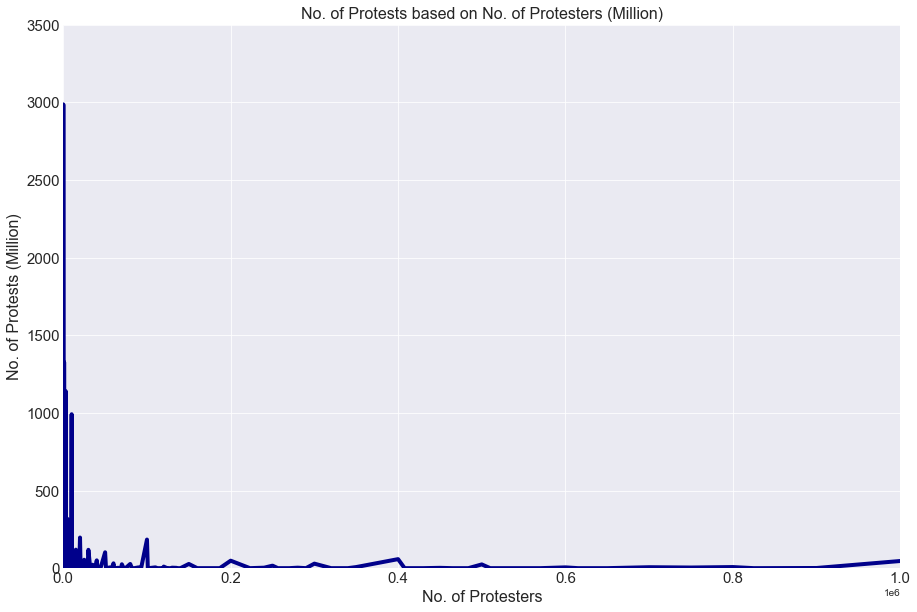

In [35]:
plt.figure(figsize=(15,10))
df['participantnumber'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=4, color='darkblue');
plt.title('No. of Protests based on No. of Protesters (Million)', fontsize=16);
plt.xlabel('No. of Protesters', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Protests (Million)', fontsize=16);
plt.xlim(0,1000000);
plt.ylim(0,3500);
plt.savefig("../project_4b/charts/protests_by_participantnumber.jpg", bbox_inches = 'tight')

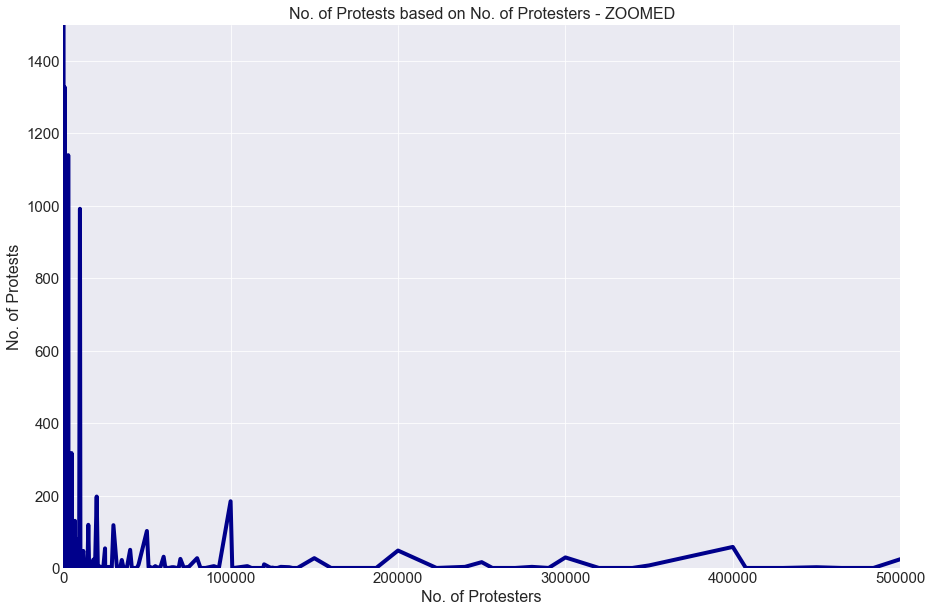

In [36]:
plt.figure(figsize=(15,10))
df['participantnumber'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=4, color='darkblue');
plt.title('No. of Protests based on No. of Protesters - ZOOMED', fontsize=16);
plt.xlabel('No. of Protesters', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Protests', fontsize=16);
plt.xlim(0,500000);
plt.ylim(0,1500);
plt.savefig("../project_4b/charts/protests_by_participantnumber_zoomed.jpg", bbox_inches = 'tight')

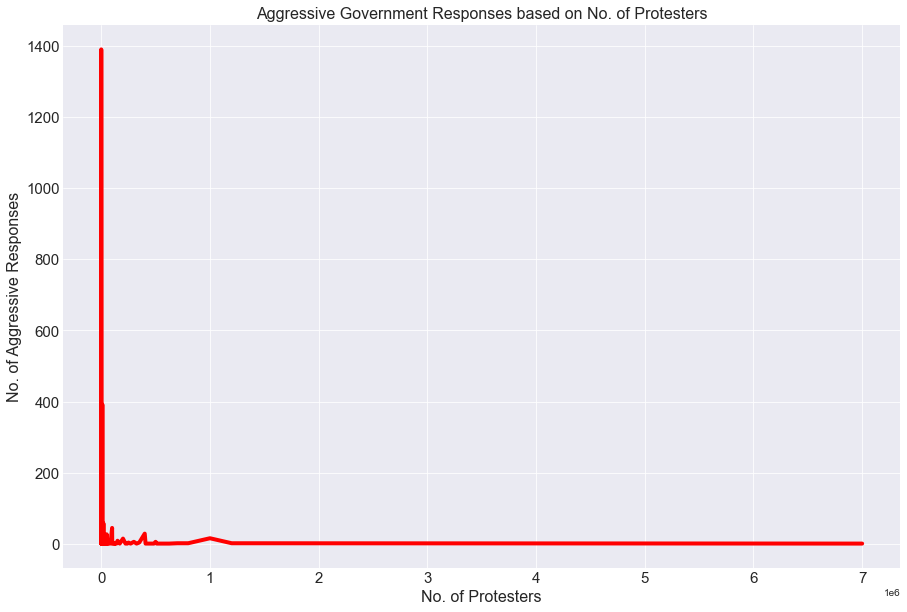

In [37]:
plt.figure(figsize=(15,10))
aggression['participantnumber'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=4, color='red');
plt.title('Aggressive Government Responses based on No. of Protesters', fontsize=16);
plt.xlabel('No. of Protesters', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Aggressive Responses', fontsize=16);

plt.savefig("../project_4b/charts/aggressive_govt_response_by_participantnumber.jpg", bbox_inches = 'tight')

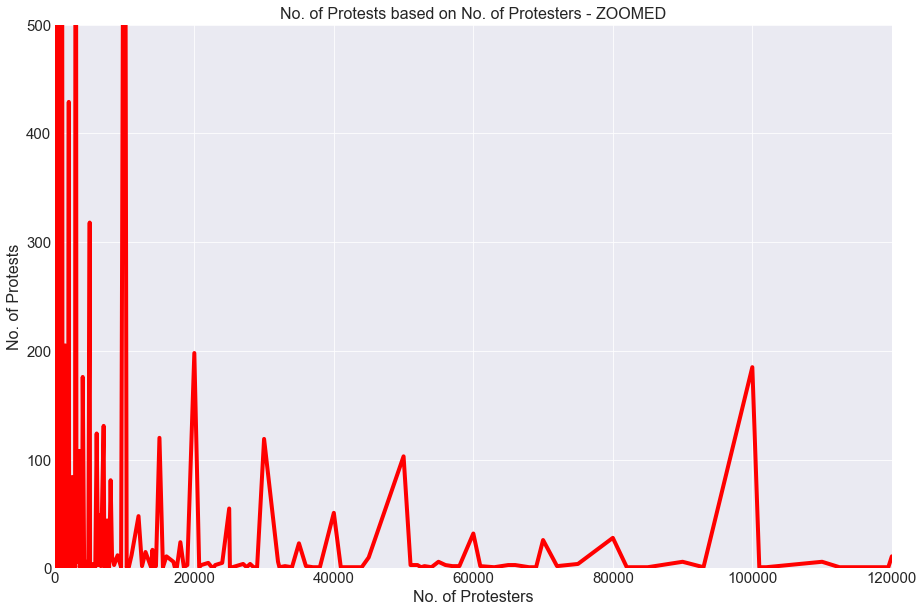

In [38]:
plt.figure(figsize=(15,10))
df['participantnumber'].value_counts().sort_index(axis=0).plot(kind='line', linewidth=4, color='red');
plt.title('No. of Protests based on No. of Protesters - ZOOMED', fontsize=16);
plt.xlabel('No. of Protesters', fontsize=16);
plt.xticks(size=15);
plt.yticks(size=15);
plt.ylabel('No. of Protests', fontsize=16);
plt.xlim(0,120000);
plt.ylim(0,500);
plt.savefig("../project_4b/charts/aggressive_govt_response_by_participantnumber_zoomed.jpg", bbox_inches = 'tight')

The **most frequent number of protesters** is **50**. **2,987 out of 15,239 protests (20%)** have registered 50 protesters. The **most frequent number of protesters to be met by aggressive government response** is also **50**. **1,390 protests** have been knocked back by aggressive responses featuring 50 protesters resulting in a **rate of aggressive government response of 47%**.

**694 out of 1,355 protests featuring 100 protesters resulted in a rate of aggressive government response of 51%**.

**570 out of 1,327 protests featuring 1,000 protesters resulted in a rate of aggressive government response of 43%**.

For both the overall number of protesters, and for the aggressive government responses against the number of protesters, sudden spikes are seen for round numbers at intervals of 10, 20, 50 protesters (50, 100, 150, 1000, 1500, etc), possibly due to the reporting done by the news source. This limits the credibility of the the most frequent number of protesters, and an attempt to find a reliable pattern in relation to aggressive government response.

## 2.8 Protester Demands that Face the Most Number of Aggressive Government Responses <a class="anchor" id="2_8"></a>

In [39]:
protester_demands = ['labor_wage_dispute', 'land_farm_issue', 'political_behavior_process', 'police_brutality', 'price_increase_tax_policy', 'removal_of_politician', 'social_restrictions']
df[protester_demands].astype(bool).sum(axis=0).sort_values(ascending=False)

political_behavior_process    10750
labor_wage_dispute             2211
removal_of_politician          1889
price_increase_tax_policy      1414
police_brutality               1101
social_restrictions             684
land_farm_issue                 582
dtype: int64

In [40]:
aggression[protester_demands].astype(bool).sum(axis=0).sort_values(ascending=False)

political_behavior_process    4475
removal_of_politician          894
labor_wage_dispute             723
police_brutality               634
price_increase_tax_policy      625
land_farm_issue                236
social_restrictions            193
dtype: int64

In [41]:
peaceful[protester_demands].astype(bool).sum(axis=0).sort_values(ascending=False)

political_behavior_process    6275
labor_wage_dispute            1488
removal_of_politician          995
price_increase_tax_policy      789
social_restrictions            491
police_brutality               467
land_farm_issue                346
dtype: int64

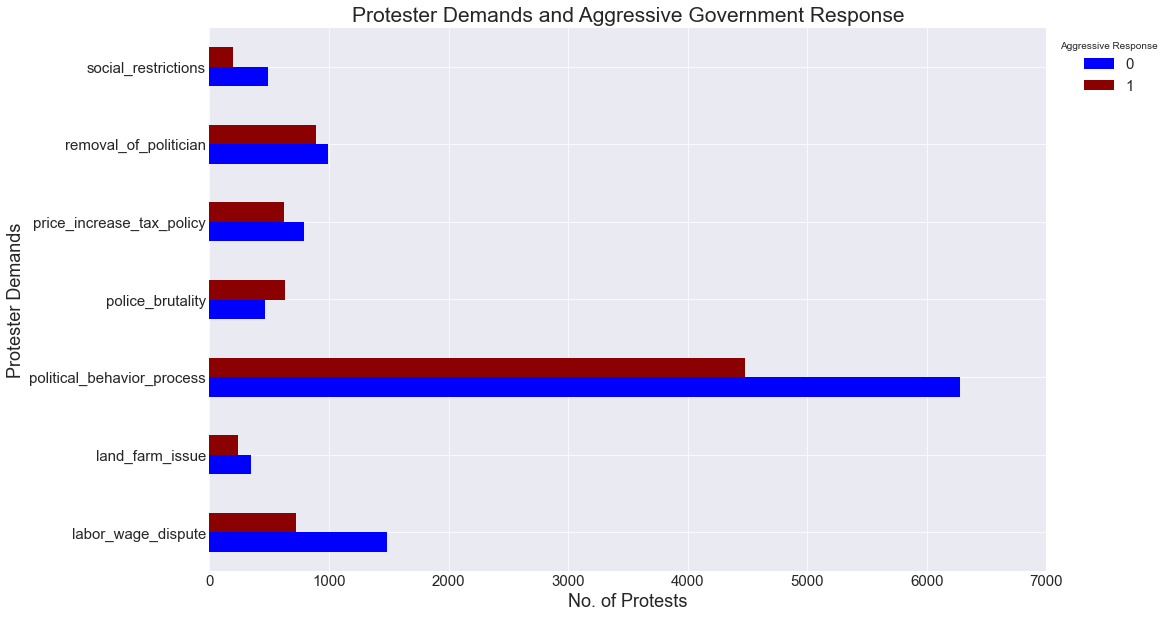

In [42]:
# isolate the variables required for the graph
graph = df[['aggressive_response','labor_wage_dispute', 'land_farm_issue', 'political_behavior_process', 'police_brutality', 'price_increase_tax_policy', 'removal_of_politician', 'social_restrictions']]
graph = graph.groupby(by='aggressive_response').sum().transpose()

# plot the graph
ax = graph.plot(kind='barh', figsize=(15, 10), color=('blue','darkred'), fontsize=15);
ax.set_xlabel('No. of Protests', fontsize=18);
ax.set_ylabel('Protester Demands', fontsize=18);
ax.set_title('Protester Demands and Aggressive Government Response', fontsize=21);
ax.legend(title='Aggressive Response', bbox_to_anchor=(1, 1), fontsize=15, loc='upper left');
ax.set_xlim(0,7000);
plt.savefig("../project_4b/charts/aggressive_gov_response_by_demands.jpg", bbox_inches = 'tight')

The overall **highest number of protests, 10,750,** belongs to the **'political_behavior_process'** which is the broadest category and captures aspects of the political process that determines who rules and how, who can participate in elections or decisions, choices made by leaders that influence a range of political outcomes from domestic subsidies to foreign policy. The general category of demanding “reform” would be captured by political behavior or processes, as would demands for democratic transitions. Given its highly political nature, it's also understandable why it also results in the **highest number of aggressive government responses: 4,475**. That's a staggering **42% rate of aggressive response**!

One limitation, however, is that we cannot read too deeply into it due to its very broad spectrum of issues which makes it more general than specifically being about a particular group of issues.

**'labor_wage_dispute'** comes in **second highest for overall number of protests** at **2,211**, but it's **third highest in getting aggressive government responses at 723** which may be due to a slightly less politically instigative nature. That's a **32% rate of aggressive response**.

**'removal_of_politician'** has the **third highest overall number of protests at **1,889**, but it beats 'labor_wage_dispute' and comes in **second highest in getting aggressive government responses at 894**, which gives it a **47% rate of aggressive response**!

**'police_brutality'**, despite only being **third lowest in overall number of protests at 1,101**, has **634 aggressive government responses**. This means that more than half of the protests related to it result in aggressive government response! This gives us our **highest rate of aggressive government response at 57%**! Speaking out against the malpractice of law enforcement officers doesn't seem to be a good idea as it only results in an even bigger backlash against the protesters.

Again, this brings us back to a similar conclusion as **'political_behavior_process'**, that protests are that more political in nature, such as protesting against a government or politician ('removal_of_politician'), and against law enforcement ('police_brutality'), seem more likely to result in an aggressive response from governments.

Moving on, we will look at studying how different protester groups fare in instigating aggressive government responses, with the eventual aim of trying to understand the relationship between protester demands and protester groups.

## 2.9 Protester Groups that Face the Most Number of Aggressive Government Responses <a class="anchor" id="2_9"></a>

#### Which Protester Groups are involved most in Protests?

In [43]:
protesters = ['abortion', 'activists', 'anti_democracy', 'democracy', 'educators', 'environmental', 'human_rights', 'immigrants', 'ethnic_discrimination', 'lgbtq', 'local_residents', 'opposition', 'peasants_villagers', 'refugees', 'religion', 'separatist_independence', 'students', 'veterans', 'men', 'women', 'agriculture', 'white_collar', 'blue_collar', 'unemployed', 'youths', 'unspecified_protesters']
df[protesters].astype(bool).sum(axis=0).sort_values(ascending=False)

unspecified_protesters     3182
blue_collar                1744
students                   1572
men                        1012
opposition                  940
local_residents             718
activists                   563
religion                    544
agriculture                 510
democracy                   505
women                       437
youths                      408
educators                   386
white_collar                366
ethnic_discrimination       282
anti_democracy              232
peasants_villagers          154
human_rights                107
immigrants                   81
separatist_independence      77
unemployed                   63
environmental                55
lgbtq                        53
veterans                     46
refugees                     27
abortion                     24
dtype: int64

The largest single category is 'unspecified_protesters', but let's put that aside and look more closely at the specific groups of protesters.

In [44]:
protester_groups = ['abortion', 'activists', 'anti_democracy', 'democracy', 'educators', 'environmental', 'human_rights', 'immigrants', 'ethnic_discrimination', 'lgbtq', 'local_residents', 'opposition', 'peasants_villagers', 'refugees', 'religion', 'separatist_independence', 'students', 'veterans', 'men', 'women', 'agriculture', 'white_collar', 'blue_collar', 'unemployed', 'youths']
df[protester_groups].astype(bool).sum(axis=0).sort_values(ascending=False)

blue_collar                1744
students                   1572
men                        1012
opposition                  940
local_residents             718
activists                   563
religion                    544
agriculture                 510
democracy                   505
women                       437
youths                      408
educators                   386
white_collar                366
ethnic_discrimination       282
anti_democracy              232
peasants_villagers          154
human_rights                107
immigrants                   81
separatist_independence      77
unemployed                   63
environmental                55
lgbtq                        53
veterans                     46
refugees                     27
abortion                     24
dtype: int64

In [45]:
aggression[protester_groups].astype(bool).sum(axis=0).sort_values(ascending=False)

students                   890
blue_collar                546
opposition                 464
men                        416
local_residents            272
democracy                  243
religion                   239
youths                     238
activists                  220
ethnic_discrimination      157
agriculture                151
women                      130
anti_democracy             109
educators                  107
white_collar                80
peasants_villagers          58
human_rights                48
separatist_independence     39
immigrants                  31
unemployed                  28
environmental               17
veterans                    15
refugees                     8
lgbtq                        8
abortion                     4
dtype: int64

In [46]:
peaceful[protester_groups].astype(bool).sum(axis=0).sort_values(ascending=False)

blue_collar                1198
students                    682
men                         596
opposition                  476
local_residents             446
agriculture                 359
activists                   343
women                       307
religion                    305
white_collar                286
educators                   279
democracy                   262
youths                      170
ethnic_discrimination       125
anti_democracy              123
peasants_villagers           96
human_rights                 59
immigrants                   50
lgbtq                        45
separatist_independence      38
environmental                38
unemployed                   35
veterans                     31
abortion                     20
refugees                     19
dtype: int64

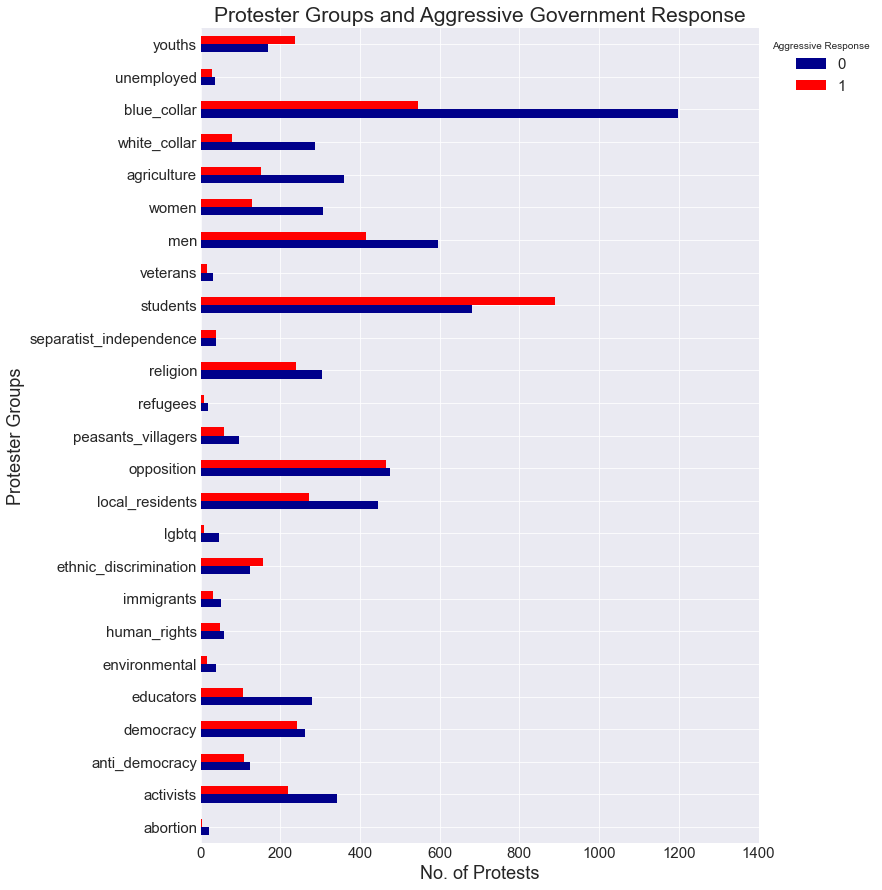

In [47]:
# isolate the variables required for the graph
graph = df[['aggressive_response', 'abortion', 'activists', 'anti_democracy', 'democracy', 'educators', 'environmental', 'human_rights', 'immigrants', 'ethnic_discrimination', 'lgbtq', 'local_residents', 'opposition', 'peasants_villagers', 'refugees', 'religion', 'separatist_independence', 'students', 'veterans', 'men', 'women', 'agriculture', 'white_collar', 'blue_collar', 'unemployed', 'youths']]
graph = graph.groupby(by='aggressive_response').sum().transpose()

# plot the graph
ax = graph.plot(kind='barh', figsize=(10, 15), color=('darkblue','red'), fontsize=15);
ax.set_xlabel('No. of Protests', fontsize=18);
ax.set_ylabel('Protester Groups', fontsize=18);
ax.set_title('Protester Groups and Aggressive Government Response', fontsize=21);
ax.legend(title='Aggressive Response', bbox_to_anchor=(1, 1), fontsize=15, loc='upper left');
ax.set_xlim(0,1400);
plt.savefig("../project_4b/charts/aggressive_gov_response_by_groups.jpg", bbox_inches = 'tight')

The top four protester groups both in number of protests and aggressive government responses are **'students'**, **'blue_collar'**, **'men'**, and **'opposition'**.

However, despite only being **second highest group for total number of protests (1,572)**, **'students'** seem to get the **most aggressive responses from governments (890)** despite having significantly lesser total protests in comparison to **'blue_collar'** protesters who have the **highest total number of protests (1,744)** but far lesser **aggressive responses (546)**. This gives **'students' the second highest rate of aggressive responses at 57%**, and **'blue_collar' a much lower rate at 31%**. 

**'opposition has aggressive government responses for 464 out of a total 940 protests**, thus giving them the **third highest rate of aggressive response at 49%** protester group. Next is **'democracy' which has a 48% rate of aggressive response from their total of 505 protests**.

This falls in line with the earlier analysis in the previous section, where some of the most aggressive government response rates were against the protester demands 'political_behavior_process' and 'removal_of_politician, that politically themed protests are more likely to result in aggressive government responses than most other types of protests.

However, the **highest rate of aggressive government response is aimed at 'youths' as 72% of their protests have resulted in aggressive response from governments**.

Outside of the top four, the **'religion'** protester group seems to also significantly instigate aggressive responses from governments.

## 3.0 Which Protester Groups are more involved in which Protester Demands?

In [48]:
df.head(0)

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions,notes_lemmatized,abortion,activists,anti_democracy,democracy,opposition,educators,environmental,human_rights,immigrants,ethnic_discrimination,lgbtq,local_residents,peasants_villagers,refugees,religion,separatist_independence,students,veterans,men,women,agriculture,white_collar,blue_collar,unemployed,youths,unspecified_protesters


In [49]:
# get correlations
df_corr = df.corr()
# irrelevant fields
fields1 = ['year', 'protestnumber', 'protesterviolence', 'participantnumber', 'protestdays', 'aggressive_response', 'unspecified_protesters', 'labor_wage_dispute', 'land_farm_issue', 'political_behavior_process', 'police_brutality', 'price_increase_tax_policy', 'removal_of_politician', 'social_restrictions']
fields2 = ['year', 'protestnumber', 'protesterviolence', 'participantnumber', 'protestdays', 'aggressive_response', 'unspecified_protesters', 'abortion', 'activists', 'anti_democracy', 'democracy', 'educators', 'environmental', 'human_rights', 'immigrants', 'ethnic_discrimination', 'lgbtq', 'local_residents', 'opposition', 'peasants_villagers', 'refugees', 'religion', 'separatist_independence', 'students', 'veterans', 'men', 'women', 'agriculture', 'white_collar', 'blue_collar', 'unemployed', 'youths']
# drop rows
df_corr.drop(fields1, axis=0, inplace=True)
# drop cols
df_corr.drop(fields2, axis=1, inplace=True)

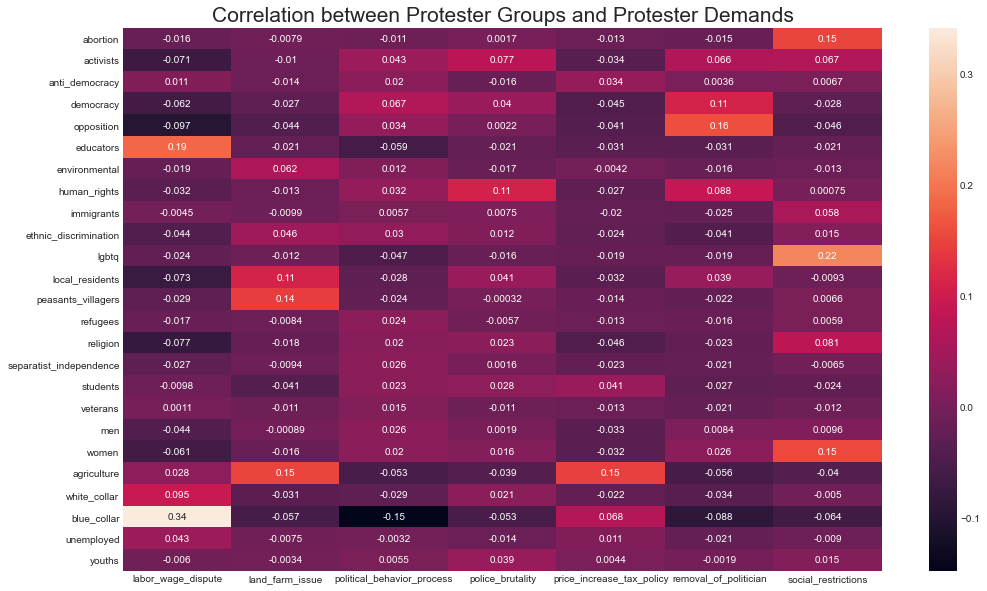

In [50]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.set_title('Correlation between Protester Groups and Protester Demands', fontsize=21);
sns.heatmap(df_corr, annot=True)
plt.savefig("../project_4b/charts/corr_demands_groups.jpg", bbox_inches = 'tight')

Correlation between **'labor_wage_dispute'** and **'blue_collar'** protesters is the highest at **0.34**, which is a fairly logical occurrence, and the correlation with **'educators'** is also **0.19**. This perhaps leads us to suspect both groups of protesters generally come from professions which they perceive are perhaps underpaid.

For **'land_farm_issue'**, there are some noticeable correlations, which though not high, are also logical. The demand correlates to **'agriculture'**, **'peasants_villagers'**, and **'local_residents'** at **0.15**, **0.14**, and **0.11** respectively.

The only noticeable occurrence for **'political_behavior_process'** is that it's inversely proportional to the **'blue_collar'** protester group, possibly indicating that the protester group is likely uninterested in engaging in politically charged protests.

**'police_brutality'** and **'human_rights'** have a correlation of **0.11**, while **'price_increase_tax_policy'** has a correlation of **0.15** with **'agriculture'** thus indicating that perhaps the issue may not just involve land-related spats, as seen in 'land_farm_issue', but also due to increases in prices and taxes related to the agriculture industry.

**'removal_of_politician'** understandably correlates with the protester groups **'opposition'** and **'democracy'** at **0.16** and **0.11**.

Finally, **'social_restrictions'** issues seem to resonate most highly with the **'lgbtq'** community at **0.22**, followed by **women** and **abortion** protester groups both tied at **0.15**. 